In [1]:
# Importing packages
import numpy as np  # for matrix and data manipulation
import pandas as pd  # for DataFrames
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for more plotitng
import statsmodels.api as sm  # for statistical modelling
import scikitplot as skplt  # for scikit-learn plotting

from sklearn.preprocessing import StandardScaler  # for preprocessing & scaling
from sklearn.preprocessing import PolynomialFeatures  # for polynomial features preprocessing
from sklearn.impute import SimpleImputer   # for missing values imputation
from sklearn.model_selection import train_test_split  # train-test splits
from sklearn.model_selection import StratifiedKFold  # K-fold resampling, stratified
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning
from sklearn.calibration import CalibratedClassifierCV  # Hyperparameter tuning with calibration
from sklearn.calibration import calibration_curve  # calibration curve plotting
from sklearn.calibration import CalibrationDisplay  # calibration curve plotting
from sklearn.metrics import confusion_matrix  # performance metrics, confusion matrix
from sklearn.metrics import classification_report  # performance matrix classifiaction report
from sklearn.metrics import roc_auc_score  # Area Under Receiver Operating Characteristics
from sklearn.metrics import roc_curve  # ROC
from sklearn.metrics import RocCurveDisplay  # ROC plotting
from sklearn.metrics import accuracy_score  # performance metric accuracy (0/1) score
from sklearn.metrics import precision_score  # performance metric
from sklearn.linear_model import LogisticRegression  # Logistic regression modelling
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.ensemble import RandomForestClassifier  # Random Forest for classification
from sklearn.ensemble import GradientBoostingClassifier  # GBM for classification
from sklearn.svm import SVC  # SVM for classification
from sklearn.utils import resample  # Resampling
from imblearn.over_sampling import SMOTE  # Synthetic upsampling

In [2]:
# Setting plotting style
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
# Jupyter magic command to show plots inline immediately
%matplotlib inline

In [4]:
# Setting seed
seed = 43
np.random.seed(seed)

In [5]:
# Loading the house price dataset
data_file_path = './'  # Set to the path of folder where you can find 'train_V2.csv' and 'score.csv'

# Training data
train_V2 = pd.read_csv(data_file_path + 'train_V2.csv')
score = pd.read_csv(data_file_path + 'score.csv')
print('Training set shape: {}' .format(train_V2.shape))
print('Score set shape: {}' .format(score.shape))

#dictionary = pd.read_csv(data_file_path + 'dictionary.csv')
#print('Dictionary set shape: {}' .format(score.shape))

Training set shape: (5000, 53)
Score set shape: (500, 50)


In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#print(train_V2.columns.tolist())
for col in score.columns.tolist():
    print(col)


income_am
profit_last_am
profit_am
damage_am
damage_inc
crd_lim_rec
credit_use_ic
gluten_ic
lactose_ic
insurance_ic
spa_ic
empl_ic
cab_requests
married_cd
bar_no
sport_ic
neighbor_income
age
marketing_permit
urban_ic
dining_ic
presidential
client_segment
sect_empl
prev_stay
prev_all_in_stay
divorce
fam_adult_size
children_no
tenure_mts
tenure_yrs
company_ic
claims_no
claims_am
nights_booked
gender
shop_am
shop_use
retired
gold_status
score1_pos
score1_neg
score2_pos
score2_neg
score3_pos
score3_neg
score4_pos
score4_neg
score5_pos
score5_neg


In [7]:
# Setting 'Id' columns as index
train_V2.insert(0, 'Id', range(0, 0 + len(train_V2)))
if 'Id' in train_V2.columns:
    train_V2 = train_V2.set_index('Id')

In [8]:
train_V2[train_V2['outcome_damage_inc']==1].head()
#train_V2.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0,0.0,16674.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,2.0,0.0,0.0,0.0,4.0,M,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
6,13293.0,28.0,14704.0,0.0,0.0,15000.0,0.0,1.0,1.0,1.0,1.0,0.0,8.0,True,18.0,0.0,33459.0,46.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,3.0,2.0,324.0,27.0,0.0,0.0,0.0,82.0,M,0.0,0.0,0.0,1.0,0.566906,0.846320,0.595743,0.901703,NaN,NaN,NaN,NaN,NaN,NaN,1676.75,1,888.09
9,229.0,810.0,1620.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,True,6.0,0.0,31718.0,29.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,145.0,12.0,0.0,0.0,0.0,4.0,M,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.196373,0.318601,NaN,NaN,NaN,NaN,1861.78,1,981.64
10,7177.0,2887.0,3770.0,0.0,0.0,15000.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,True,11.0,0.0,34575.0,53.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,2.0,0.0,167.0,14.0,0.0,0.0,0.0,19.0,V,0.0,0.0,0.0,0.0,NaN,NaN,0.222590,0.130548,NaN,NaN,0.276508,0.882461,NaN,NaN,1761.14,1,483.05
11,3240.0,1212.0,2750.0,2762.0,6.0,12000.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,True,9.0,1.0,31135.0,53.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,1.0,477.0,40.0,0.0,0.0,0.0,13.0,V,0.0,0.0,0.0,0.0,0.390233,0.526528,NaN,NaN,NaN,NaN,0.044849,0.649934,NaN,NaN,2109.04,1,1046.70


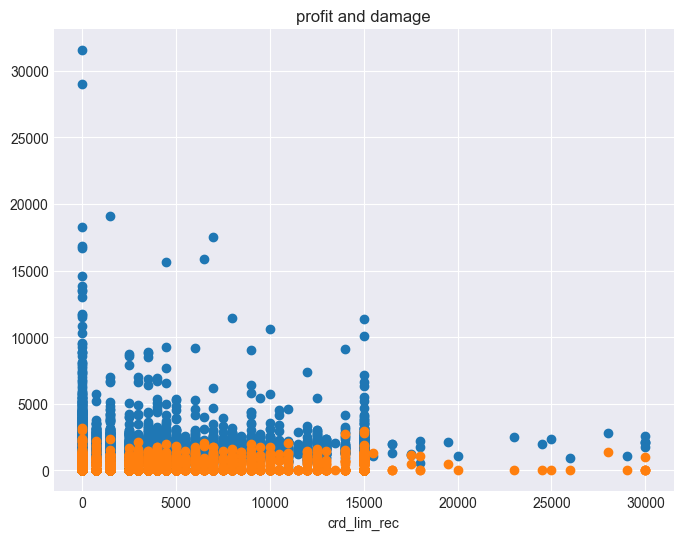

In [17]:
# Plotting
x = 'crd_lim_rec'
plt.figure(figsize=(8, 6))
plt.scatter(x=train_V2[x], y=train_V2['outcome_profit']);
plt.scatter(x=train_V2[x], y=train_V2['outcome_damage_amount']);
plt.title('profit and damage');
plt.xlabel(x);

<Axes: title={'center': 'test'}, xlabel='Id'>

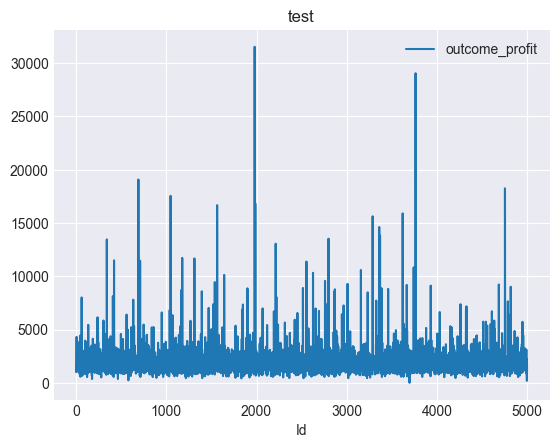

In [19]:
train_V2.plot(y='                                                                                                                                                                       ',use_index=True,title='test')

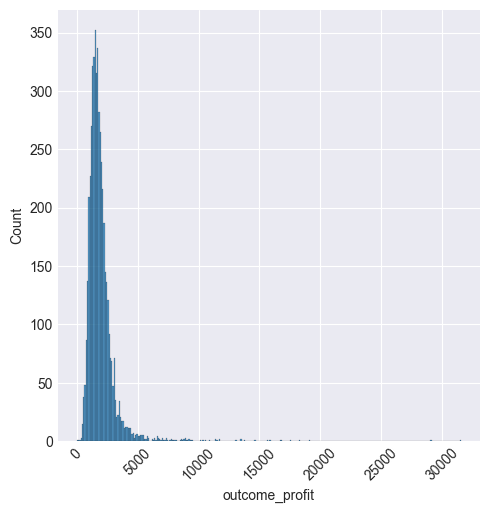

In [10]:
# Checking univariate distribution of the sales price
sns.displot(train_V2['outcome_profit']);  # With seaborn for a change
plt.xticks(rotation=45); # Rotating x labels

# plt alternative
#plt.hist(train_V2['outcome_profit']);

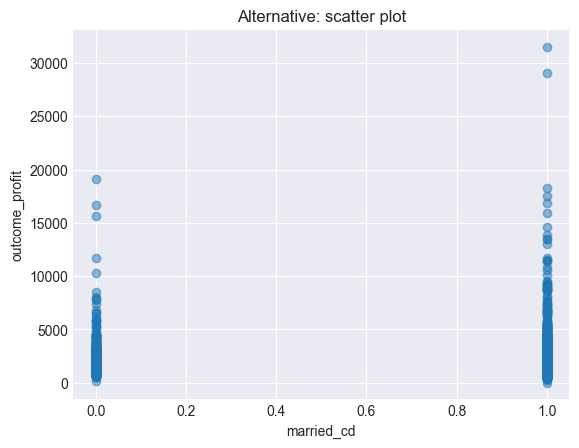

In [11]:
# But I guess a scatter plot would've done well also

x='married_cd'
plt.scatter(x=train_V2[x], y=train_V2['outcome_profit'], alpha=0.5);  # alpha=0.5 makes it a bit see through
plt.xlabel(x);
plt.ylabel('outcome_profit');
plt.title('Alternative: scatter plot');
plt.show() 


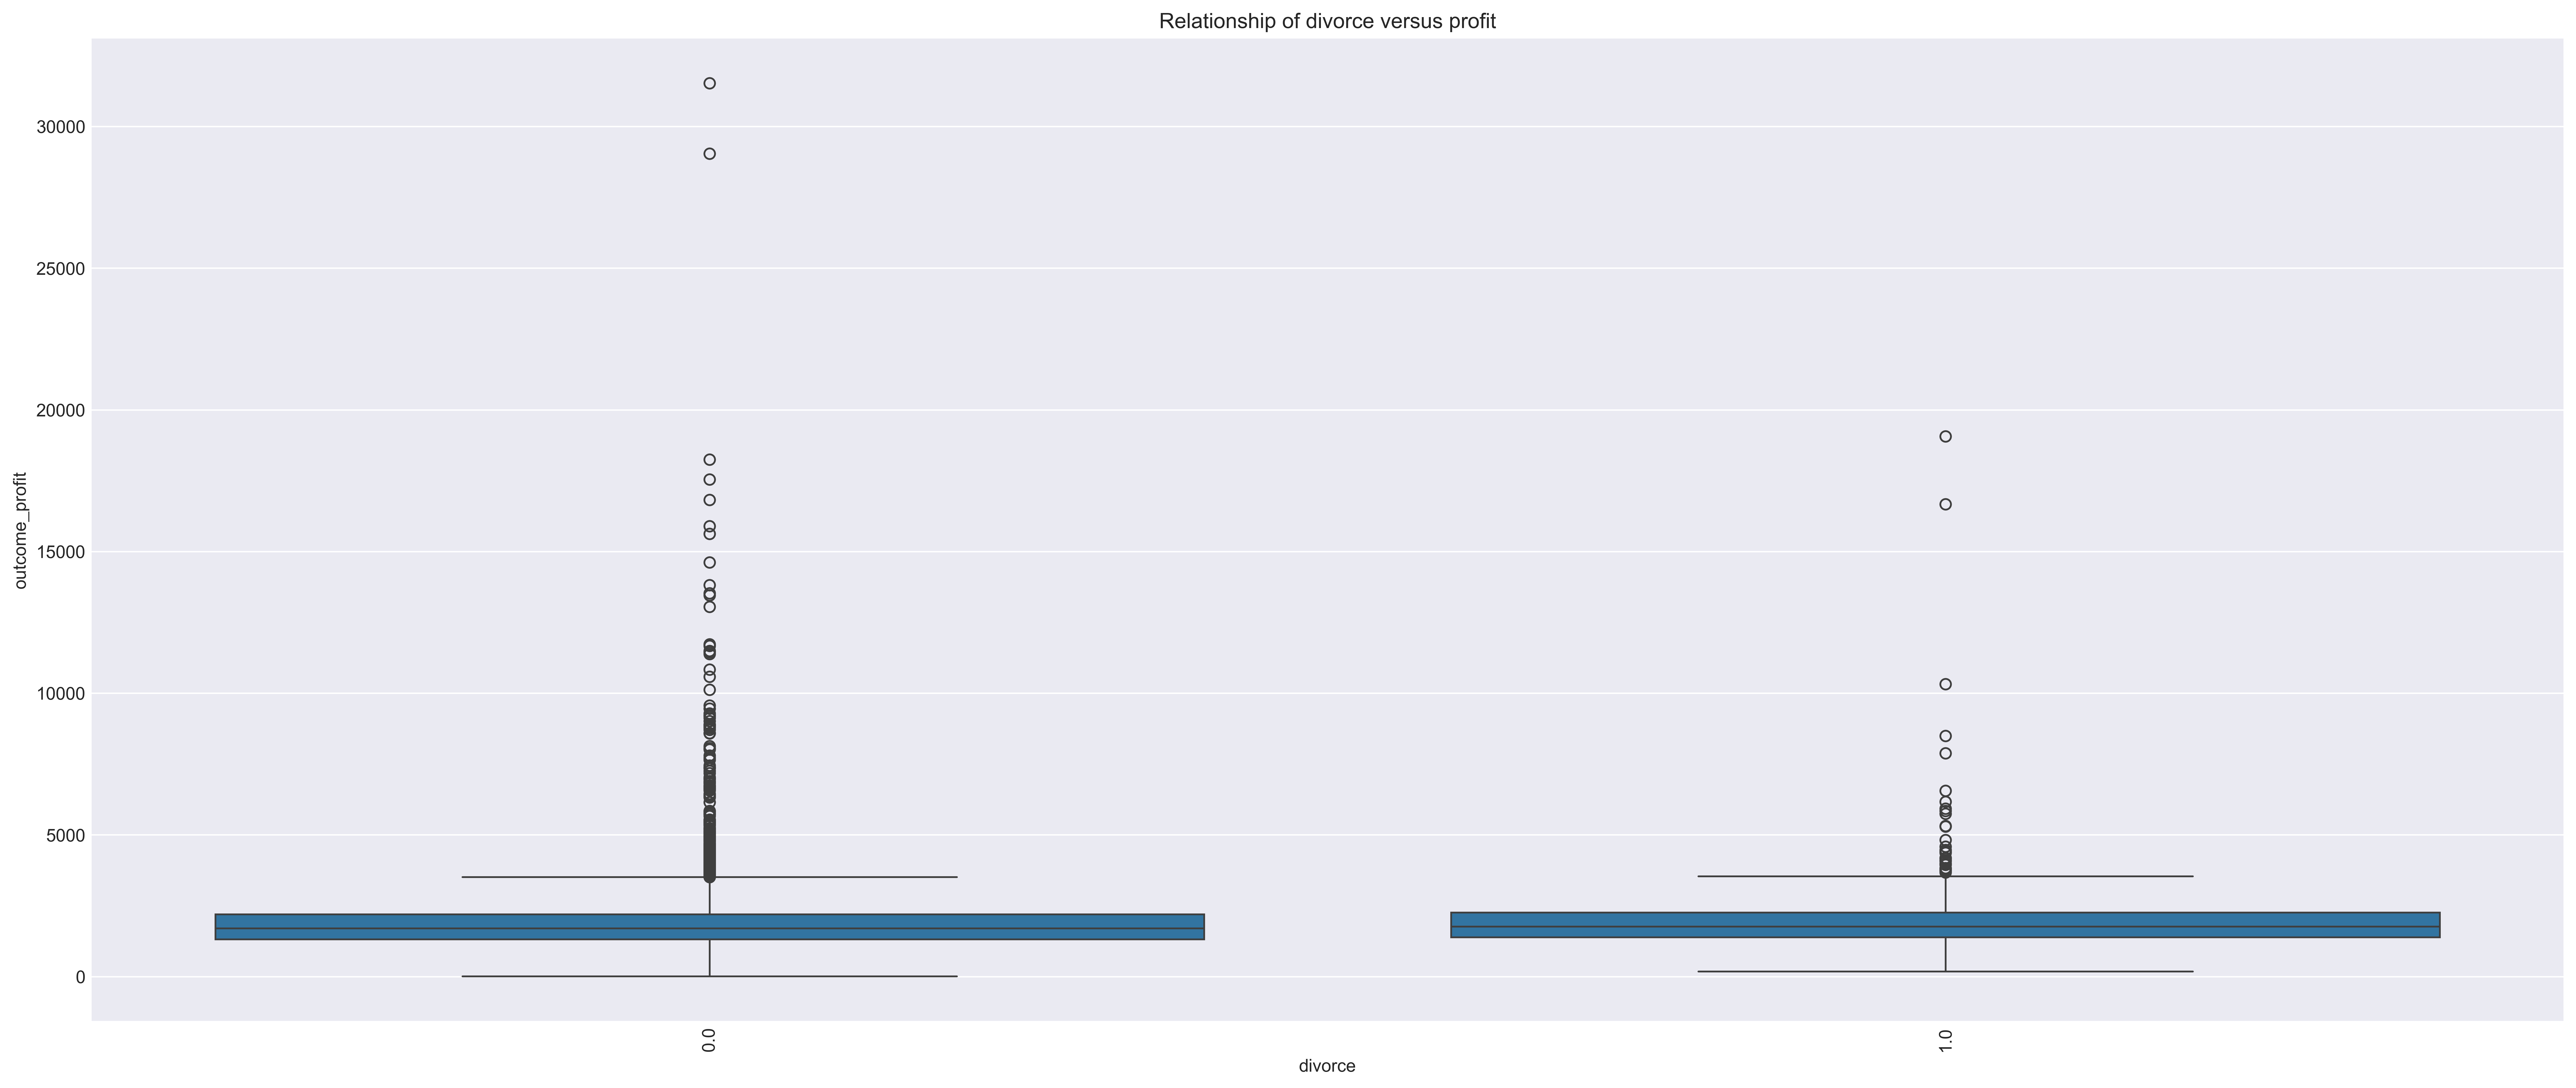

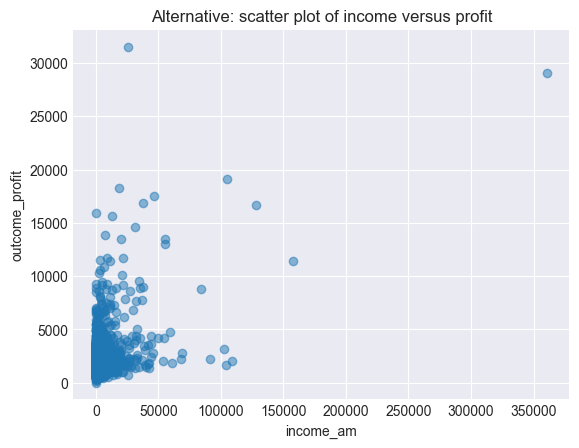

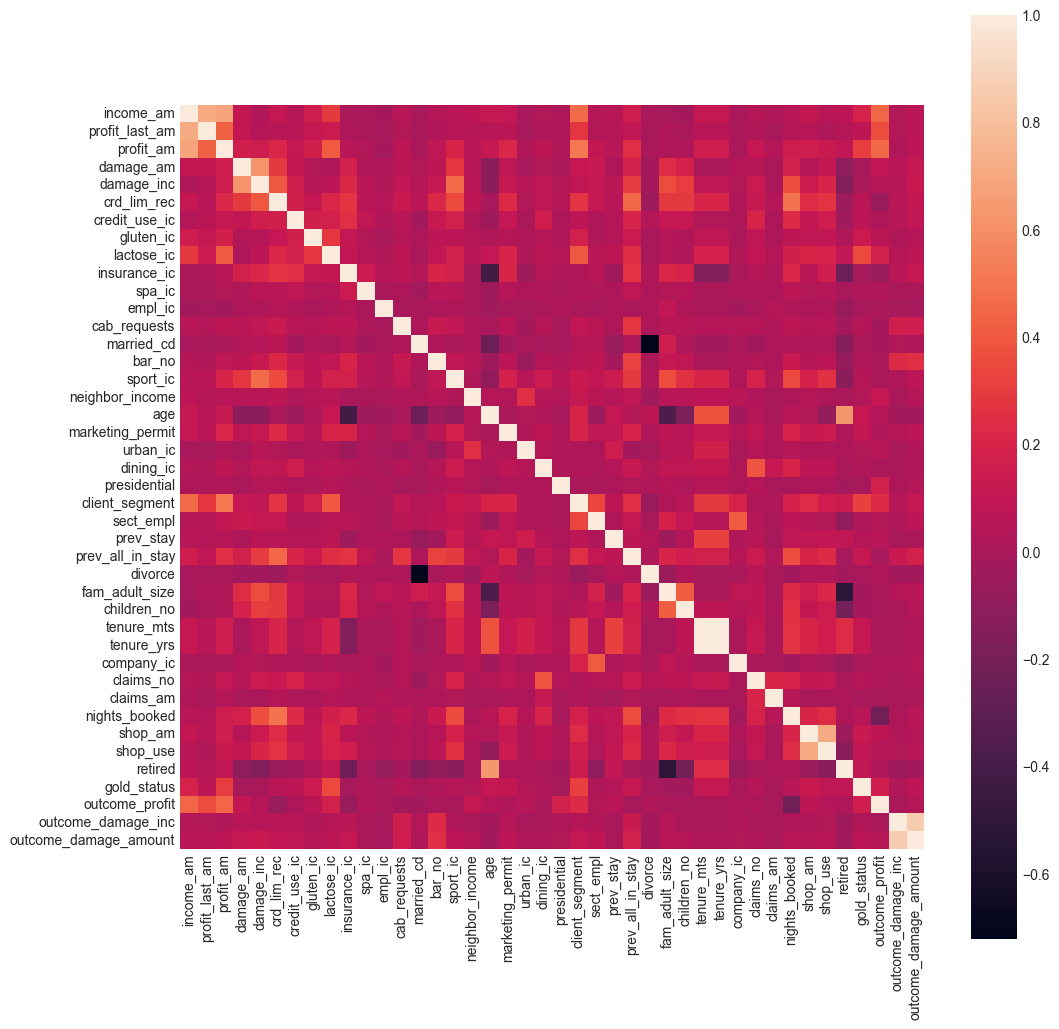

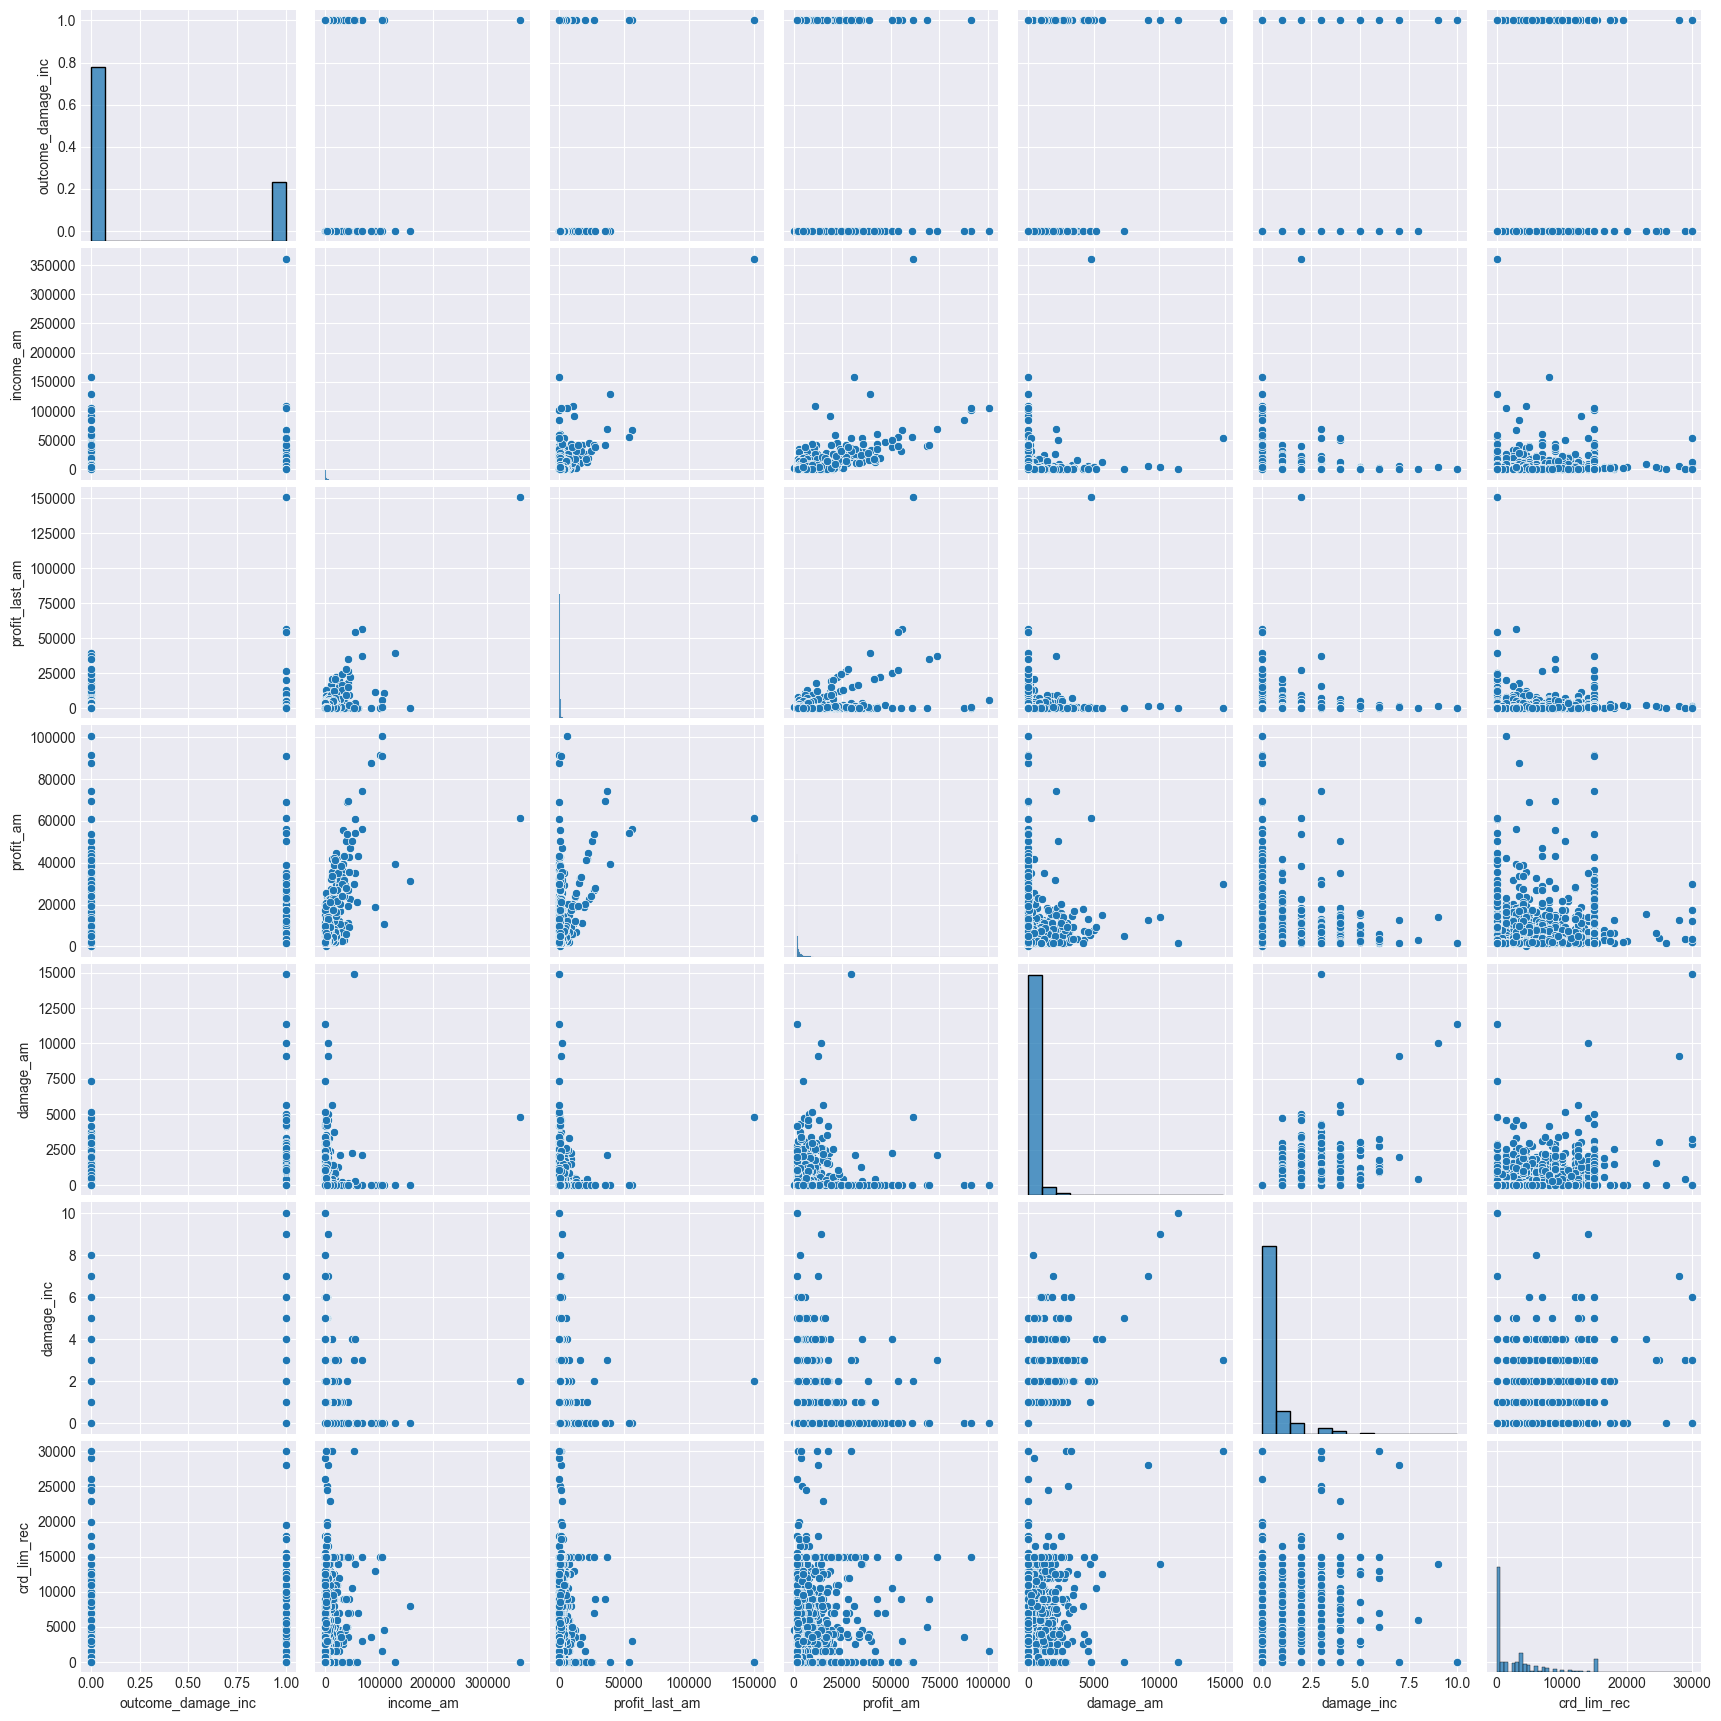

In [40]:
# Boxplot-type for year built vs SalePrice
plt.figure(figsize=(25, 10), dpi=500)  # Bumping up image size and DPI for better viewing
sns.boxplot(x='divorce', y='outcome_profit', data=train_V2);
plt.xticks(rotation=90);  # To rotate x-axis labels
plt.title('Relationship of divorce versus profit');
plt.show()  # remember: necessary to do this when trying to plot multiple plots from a single cell!

# But I guess a scatter plot would've done well also
plt.scatter(x=train_V2['income_am'], y=train_V2['outcome_profit'], alpha=0.5);  # alpha=0.5 makes it a bit see through
plt.xlabel('income_am');
plt.ylabel('outcome_profit');
plt.title('Alternative: scatter plot of income versus profit');
plt.show() 

# Correlation matrix between features
corrmat = train_V2.corr(numeric_only=True)  # Since Pandas 2.0 you need to supply this attribute
plt.figure(figsize=(12, 12));
sns.heatmap(corrmat, vmax=1, square=True);
# Note, we keep SalePrice in here as well, proceed with caution (no data snooping!)

# Scatterplot matrix (might take a while)
plot_cols = ['outcome_damage_inc', 'income_am', 'profit_last_am', 'profit_am', 'damage_am', 'damage_inc', 'crd_lim_rec']
sns.pairplot(train_V2[plot_cols], height=2.5);

In [13]:
# Getting an idea about total missing values
total_missings = train_V2.isnull().sum().sort_values(ascending=False)  # total missng values, sorted
total_missings.head(20)  # Show top 20 most missing features

# Getting an idea about percentage missing values
pct_missings = train_V2.isnull().mean().sort_values(ascending=False)  # average (%) missng values, sorted
pct_missings.head(20)  # Show top 20 most missing features

score2_pos         0.7582
score4_pos         0.7554
score1_pos         0.7550
score5_pos         0.7536
score3_pos         0.7478
score2_neg         0.7392
score1_neg         0.7372
score4_neg         0.7352
score3_neg         0.7266
score5_neg         0.7014
tenure_yrs         0.0784
tenure_mts         0.0784
neighbor_income    0.0478
shop_use           0.0176
presidential       0.0176
cab_requests       0.0176
dining_ic          0.0176
company_ic         0.0106
claims_no          0.0106
income_am          0.0106
dtype: float64

In [36]:
# Remove the features missing mor tha 15% (score*_pos, neg)
print(f"Shape of train_V2 BEFORE dropping missing features: {train_V2.shape}")
missing_a_lot = pct_missings[pct_missings > 0.15].index  # we take from all variables those missing most, and take the row-idx
print(f"Columns missing more than 15% :{missing_a_lot}")
train_V2 = train_V2.drop(missing_a_lot, axis=1)
print(f"Shape of train_V2 AFTER dropping missing features: {train_V2.shape}")

Shape of train_V2 BEFORE dropping missing features: (5000, 53)
Columns missing more than 15% :Index(['score2_pos', 'score4_pos', 'score1_pos', 'score5_pos', 'score3_pos',
       'score2_neg', 'score1_neg', 'score4_neg', 'score3_neg', 'score5_neg'],
      dtype='object')
Shape of train_V2 AFTER dropping missing features: (5000, 43)


In [34]:
#Voor een aantal (53) waarnemingen blijken er veel gegevens te ontbreken. Deze kunnen beter voor verdere analyse verwijderd worden
missing_data = train_V2[train_V2['prev_stay'].isnull()]
#missing_data.to_csv('missing_data.csv')
print(missing_data.index)
train_V2 = train_V2.drop(missing_data.index)

Index([  90,  306,  474,  517,  670,  790,  996, 1062, 1164, 1261, 1275, 1281,
       1338, 1448, 1696, 1744, 1852, 2058, 2096, 2250, 2348, 2672, 2696, 2734,
       2917, 2956, 3068, 3198, 3213, 3326, 3377, 3494, 3793, 3926, 3952, 3959,
       3990, 4000, 4009, 4138, 4159, 4242, 4392, 4477, 4528, 4545, 4614, 4641,
       4669, 4789, 4851, 4946, 4993],
      dtype='int64', name='Id')
4947


In [38]:
numeric_cols=[]
non_numeric_cols=[]
for col in train_V2.columns.tolist():
    if col[-2:] == 'am':
        numeric_cols.append(col)
    else:
        non_numeric_cols.append(col)

#non_numeric_cols = train_V2.select_dtypes(exclude='number').columns
print(non_numeric_cols)
train_V2[non_numeric_cols].head()

['damage_inc', 'crd_lim_rec', 'credit_use_ic', 'gluten_ic', 'lactose_ic', 'insurance_ic', 'spa_ic', 'empl_ic', 'cab_requests', 'married_cd', 'bar_no', 'sport_ic', 'neighbor_income', 'age', 'marketing_permit', 'urban_ic', 'dining_ic', 'presidential', 'client_segment', 'sect_empl', 'prev_stay', 'prev_all_in_stay', 'divorce', 'fam_adult_size', 'children_no', 'tenure_mts', 'tenure_yrs', 'company_ic', 'claims_no', 'nights_booked', 'gender', 'shop_use', 'retired', 'gold_status', 'outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount']


,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,nights_booked,gender,shop_use,retired,gold_status,outcome_profit,outcome_damage_inc,outcome_damage_amount
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,True,2.0,1.0,28936.0,37.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,476.0,40.0,0.0,0.0,209.0,M,0.0,0.0,0.0,1791.66,0,0.00
1,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0,0.0,16674.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,2.0,0.0,0.0,4.0,M,0.0,0.0,0.0,1672.78,1,829.66
2,0.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,4.0,0.0,32552.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,95.0,8.0,0.0,0.0,6.0,M,0.0,0.0,0.0,1001.40,0,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,True,8.0,1.0,32252.0,37.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,NaN,NaN,0.0,0.0,4.0,V,0.0,0.0,0.0,1785.59,0,0.00
4,2.0,14000.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,False,2.0,1.0,29605.0,26.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,354.0,30.0,0.0,0.0,3.0,V,1.0,0.0,0.0,3140.74,0,0.00


In [39]:
# Checking frequency table of a feature (xxx)
for col in non_numeric_cols:
    #print(col)
    print(col,f'y_train frequency table:  \n{train_V2[col].value_counts()}')

damage_inc y_train frequency table:  
damage_inc
0.0     4010
1.0      482
2.0      243
3.0      124
4.0       61
5.0       14
6.0        8
7.0        2
10.0       1
9.0        1
8.0        1
Name: count, dtype: int64
crd_lim_rec y_train frequency table:  
crd_lim_rec
0.0        2243
15000.0     284
1500.0      232
750.0       225
3000.0      214
4000.0      203
3500.0      202
2500.0      192
4500.0      188
5000.0      158
6000.0      138
7000.0      113
8000.0       80
9000.0       72
10000.0      59
12500.0      38
11000.0      37
5500.0       37
12000.0      36
6500.0       33
14000.0      30
13000.0      29
7500.0       24
8500.0       20
9500.0       18
10500.0      13
11500.0       6
30000.0       5
16500.0       3
18000.0       3
17500.0       2
26000.0       1
25000.0       1
13500.0       1
15500.0       1
23000.0       1
28000.0       1
20000.0       1
29000.0       1
24500.0       1
19500.0       1
Name: count, dtype: int64
credit_use_ic y_train frequency table:  
credit_u